## Introduction

First, let’s create explainers for random Forest model and linear model

In [28]:
library("DALEX")
library("randomForest")
library("ceterisParibus")
set.seed(59)

apartments_lm_model <- lm(m2.price ~ construction.year + surface + floor + 
                            no.rooms + district, data = apartments)

apartments_rf_model <- randomForest(m2.price ~ construction.year + surface + floor + 
                                      no.rooms + district, data = apartments)

explainer_rf <- explain(apartments_rf_model, 
                        data = apartmentsTest[,2:6], y = apartmentsTest$m2.price)
explainer_lm <- explain(apartments_lm_model, 
                        data = apartmentsTest[,2:6], y = apartmentsTest$m2.price)

## Ceteris Paribus Plots

Please, note that there are two methods that create Ceteris Paribus Plots. The older solution is to use `what_if()` function. The new solution is to use `ceteris_paribus()` function. These functions have slightly different interfaces.

## The old interface (what_if)

Here is the one with `what_if()`.

In [29]:
new_apartment <- apartmentsTest[1, ]
new_apartment

m2.price construction.year surface floor no.rooms district   
1001 4644     1976              131     3     5        Srodmiescie

In [30]:
wi_rf <- what_if(explainer_rf, observation = new_apartment)
wi_rf

y_hat    new_x vname             x_quant   quant relative_quant
0%    4255.354 1920  construction.year 0.6268889 0.00  -0.6268889    
1%    4300.702 1921  construction.year 0.6268889 0.01  -0.6168889    
2%    4301.926 1922  construction.year 0.6268889 0.02  -0.6068889    
3%    4305.352 1923  construction.year 0.6268889 0.03  -0.5968889    
4%    4305.352 1923  construction.year 0.6268889 0.04  -0.5868889    
5%    4267.723 1924  construction.year 0.6268889 0.05  -0.5768889    
6%    4264.109 1925  construction.year 0.6268889 0.06  -0.5668889    
7%    4261.677 1926  construction.year 0.6268889 0.07  -0.5568889    
8%    4238.826 1927  construction.year 0.6268889 0.08  -0.5468889    
9%    4253.075 1928  construction.year 0.6268889 0.09  -0.5368889    
10%   4247.620 1929  construction.year 0.6268889 0.10  -0.5268889    
11%   4242.458 1930  construction.year 0.6268889 0.11  -0.5168889    
12%   4216.846 1931  construction.year 0.6268889 0.12  -0.5068889    
13%   4221.414 1932  construction.year 0.6268889 0.13  -0.4968889    
14%   4225.165 1933  construction.year 0.6268889 0.14  -0.4868889    
15%   4225.165 1933  construction.year 0.6268889 0.15  -0.4768889    
16%   4229.791 1934  construction.year 0.6268889 0.16  -0.4668889    
17%   4209.735 1935  construction.year 0.6268889 0.17  -0.4568889    
18%   4189.539 1936  construction.year 0.6268889 0.18  -0.4468889    
19%   4213.459 1937  construction.year 0.6268889 0.19  -0.4368889    
20%   4219.782 1938  construction.year 0.6268889 0.20  -0.4268889    
21%   4193.273 1939  construction.year 0.6268889 0.21  -0.4168889    
22%   4167.281 1940  construction.year 0.6268889 0.22  -0.4068889    
23%   4167.281 1940  construction.year 0.6268889 0.23  -0.3968889    
24%   4157.711 1941  construction.year 0.6268889 0.24  -0.3868889    
25%   4157.370 1942  construction.year 0.6268889 0.25  -0.3768889    
26%   4145.599 1943  construction.year 0.6268889 0.26  -0.3668889    
27%   4136.761 1944  construction.year 0.6268889 0.27  -0.3568889    
28%   4137.529 1945  construction.year 0.6268889 0.28  -0.3468889    
29%   4125.729 1946  construction.year 0.6268889 0.29  -0.3368889    
⋮     ⋮        ⋮     ⋮                 ⋮         ⋮     ⋮             
71%3  4181.187 4     no.rooms          0.9381111 0.71  -0.228111111  
72%3  4181.187 4     no.rooms          0.9381111 0.72  -0.218111111  
73%3  4181.187 4     no.rooms          0.9381111 0.73  -0.208111111  
74%3  4181.187 4     no.rooms          0.9381111 0.74  -0.198111111  
75%3  4181.187 4     no.rooms          0.9381111 0.75  -0.188111111  
76%3  4181.187 4     no.rooms          0.9381111 0.76  -0.178111111  
77%3  4160.840 5     no.rooms          0.9381111 0.77  -0.168111111  
78%3  4160.840 5     no.rooms          0.9381111 0.78  -0.158111111  
79%3  4160.840 5     no.rooms          0.9381111 0.79  -0.148111111  
80%3  4160.840 5     no.rooms          0.9381111 0.80  -0.138111111  
81%3  4160.840 5     no.rooms          0.9381111 0.81  -0.128111111  
82%3  4160.840 5     no.rooms          0.9381111 0.82  -0.118111111  
83%3  4160.840 5     no.rooms          0.9381111 0.83  -0.108111111  
84%3  4160.840 5     no.rooms          0.9381111 0.84  -0.098111111  
85%3  4160.840 5     no.rooms          0.9381111 0.85  -0.088111111  
86%3  4160.840 5     no.rooms          0.9381111 0.86  -0.078111111  
87%3  4160.840 5     no.rooms          0.9381111 0.87  -0.068111111  
88%3  4160.840 5     no.rooms          0.9381111 0.88  -0.058111111  
89%3  4160.840 5     no.rooms          0.9381111 0.89  -0.048111111  
90%3  4160.840 5     no.rooms          0.9381111 0.90  -0.038111111  
91%3  4160.840 5     no.rooms          0.9381111 0.91  -0.028111111  
92%3  4160.840 5     no.rooms          0.9381111 0.92  -0.018111111  
93%3  4160.840 5     no.rooms          0.9381111 0.93  -0.008111111  
94%3  4016.294 6     no.rooms          0.9381111 0.94   0.001888889  
95%3  4016.294 6     no.rooms          0.9381111 0.95   0.011888889  
96%3  4016.294 6

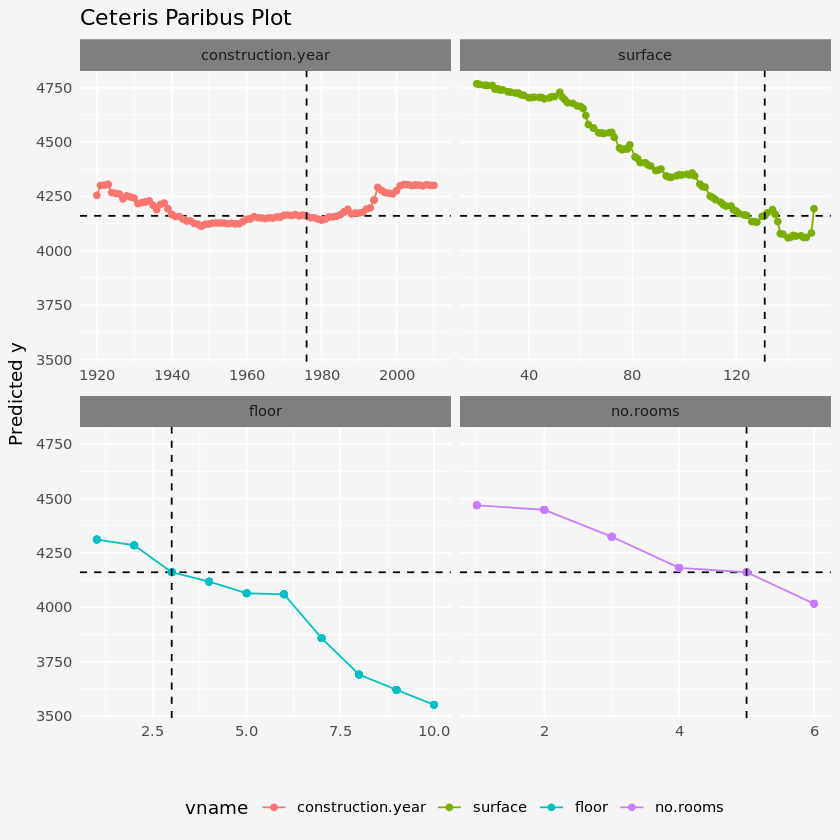

In [31]:
plot(wi_rf, split = "variables", color = "variables", quantiles = FALSE)

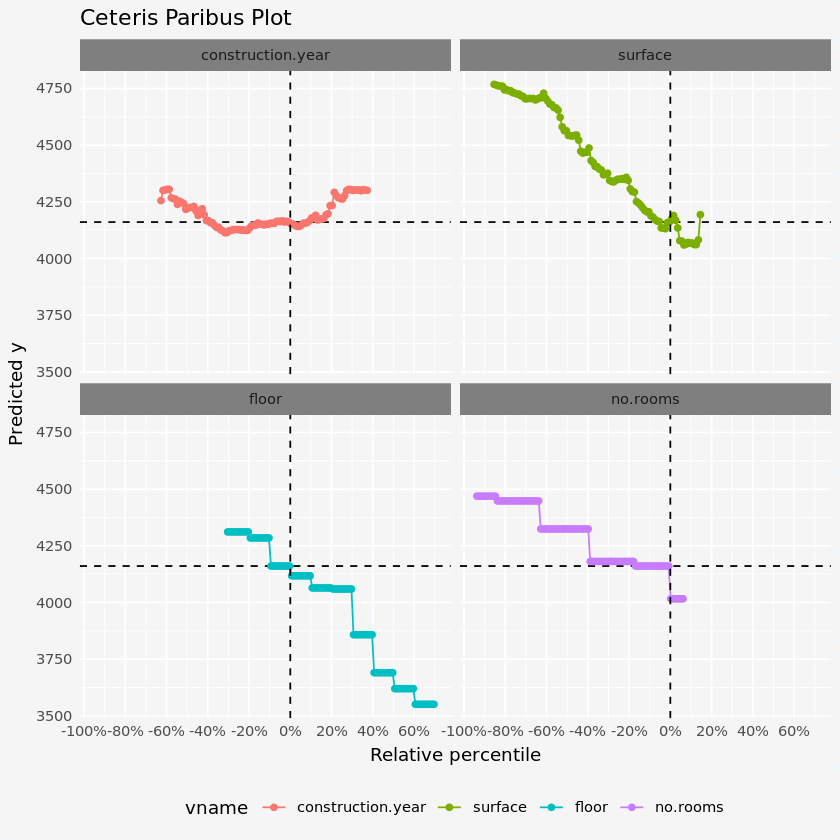

In [32]:
plot(wi_rf, split = "variables", color = "variables")

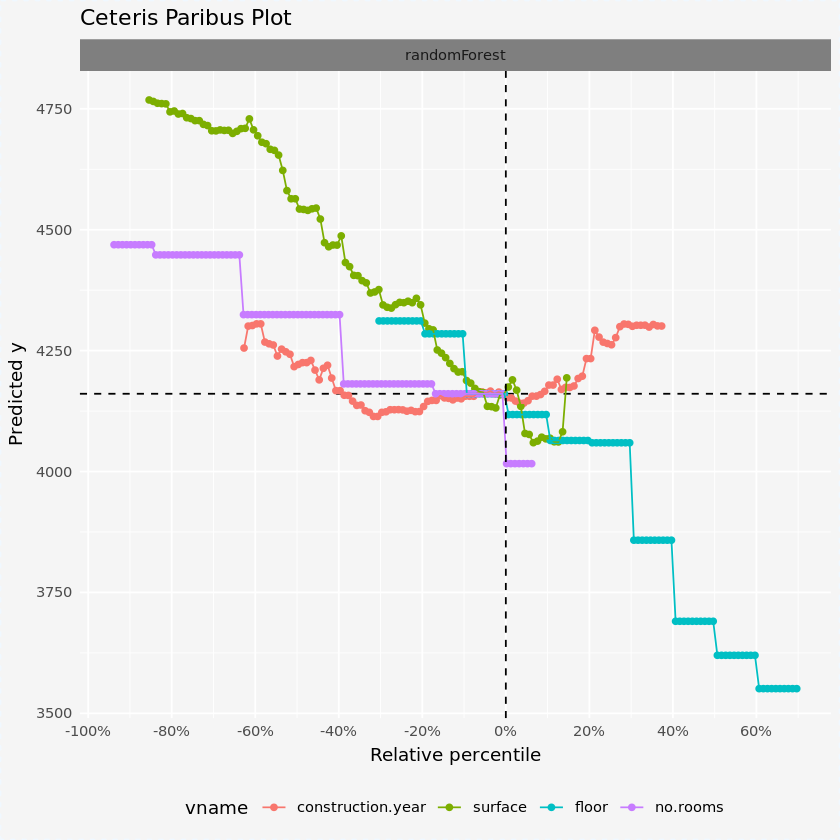

In [33]:
plot(wi_rf)

In [34]:
wi_lm <- what_if(explainer_lm, observation = new_apartment)
wi_lm

y_hat    new_x vname             x_quant   quant relative_quant label
1001      4832.833 1920  construction.year 0.6268889 0.00  -0.6268889     lm   
1001.1    4832.604 1921  construction.year 0.6268889 0.01  -0.6168889     lm   
1001.2    4832.375 1922  construction.year 0.6268889 0.02  -0.6068889     lm   
1001.3    4832.146 1923  construction.year 0.6268889 0.03  -0.5968889     lm   
1001.4    4832.146 1923  construction.year 0.6268889 0.04  -0.5868889     lm   
1001.5    4831.917 1924  construction.year 0.6268889 0.05  -0.5768889     lm   
1001.6    4831.688 1925  construction.year 0.6268889 0.06  -0.5668889     lm   
1001.7    4831.459 1926  construction.year 0.6268889 0.07  -0.5568889     lm   
1001.8    4831.230 1927  construction.year 0.6268889 0.08  -0.5468889     lm   
1001.9    4831.001 1928  construction.year 0.6268889 0.09  -0.5368889     lm   
1001.10   4830.772 1929  construction.year 0.6268889 0.10  -0.5268889     lm   
1001.11   4830.543 1930  construction.year 0.6268889 0.11  -0.5168889     lm   
1001.12   4830.314 1931  construction.year 0.6268889 0.12  -0.5068889     lm   
1001.13   4830.085 1932  construction.year 0.6268889 0.13  -0.4968889     lm   
1001.14   4829.856 1933  construction.year 0.6268889 0.14  -0.4868889     lm   
1001.15   4829.856 1933  construction.year 0.6268889 0.15  -0.4768889     lm   
1001.16   4829.627 1934  construction.year 0.6268889 0.16  -0.4668889     lm   
1001.17   4829.398 1935  construction.year 0.6268889 0.17  -0.4568889     lm   
1001.18   4829.169 1936  construction.year 0.6268889 0.18  -0.4468889     lm   
1001.19   4828.940 1937  construction.year 0.6268889 0.19  -0.4368889     lm   
1001.20   4828.711 1938  construction.year 0.6268889 0.20  -0.4268889     lm   
1001.21   4828.482 1939  construction.year 0.6268889 0.21  -0.4168889     lm   
1001.22   4828.253 1940  construction.year 0.6268889 0.22  -0.4068889     lm   
1001.23   4828.253 1940  construction.year 0.6268889 0.23  -0.3968889     lm   
1001.24   4828.024 1941  construction.year 0.6268889 0.24  -0.3868889     lm   
1001.25   4827.795 1942  construction.year 0.6268889 0.25  -0.3768889     lm   
1001.26   4827.566 1943  construction.year 0.6268889 0.26  -0.3668889     lm   
1001.27   4827.337 1944  construction.year 0.6268889 0.27  -0.3568889     lm   
1001.28   4827.108 1945  construction.year 0.6268889 0.28  -0.3468889     lm   
1001.29   4826.879 1946  construction.year 0.6268889 0.29  -0.3368889     lm   
⋮         ⋮        ⋮     ⋮                 ⋮         ⋮     ⋮              ⋮    
1001.715  4857.739 4     no.rooms          0.9381111 0.71  -0.228111111   lm   
1001.723  4857.739 4     no.rooms          0.9381111 0.72  -0.218111111   lm   
1001.733  4857.739 4     no.rooms          0.9381111 0.73  -0.208111111   lm   
1001.743  4857.739 4     no.rooms          0.9381111 0.74  -0.198111111   lm   
1001.753  4857.739 4     no.rooms          0.9381111 0.75  -0.188111111   lm   
1001.763  4857.739 4     no.rooms          0.9381111 0.76  -0.178111111   lm   
1001.773  4820.009 5     no.rooms          0.9381111 0.77  -0.168111111   lm   
1001.783  4820.009 5     no.rooms          0.9381111 0.78  -0.158111111   lm   
1001.793  4820.009 5     no.rooms          0.9381111 0.79  -0.148111111   lm   
1001.803  4820.009 5     no.rooms          0.9381111 0.80  -0.138111111   lm   
1001.815  4820.009 5     no.rooms          0.9381111 0.81  -0.128111111   lm   
1001.823  4820.009 5     no.rooms          0.9381111 0.82  -0.118111111   lm   
1001.833  4820.009 5     no.rooms          0.9381111 0.83  -0.108111111   lm   
1001.843  4820.009 5     no.rooms          0.9381111 0.84  -0.098111111   lm   
1001.853  4820.009 5     no.rooms          0.9381111 0.85  -0.088111111   lm   
1001.863  4820.009 5     no.rooms          0.9381111 0.86  -0.078111111   lm   
1001.873  4820.009 5     no.rooms          0.9381111 0.87  -0.068111111   lm   
1001.883  4820.009 5     no.rooms          0.9381111 0.88  -0.058111111   lm   
1001.893  

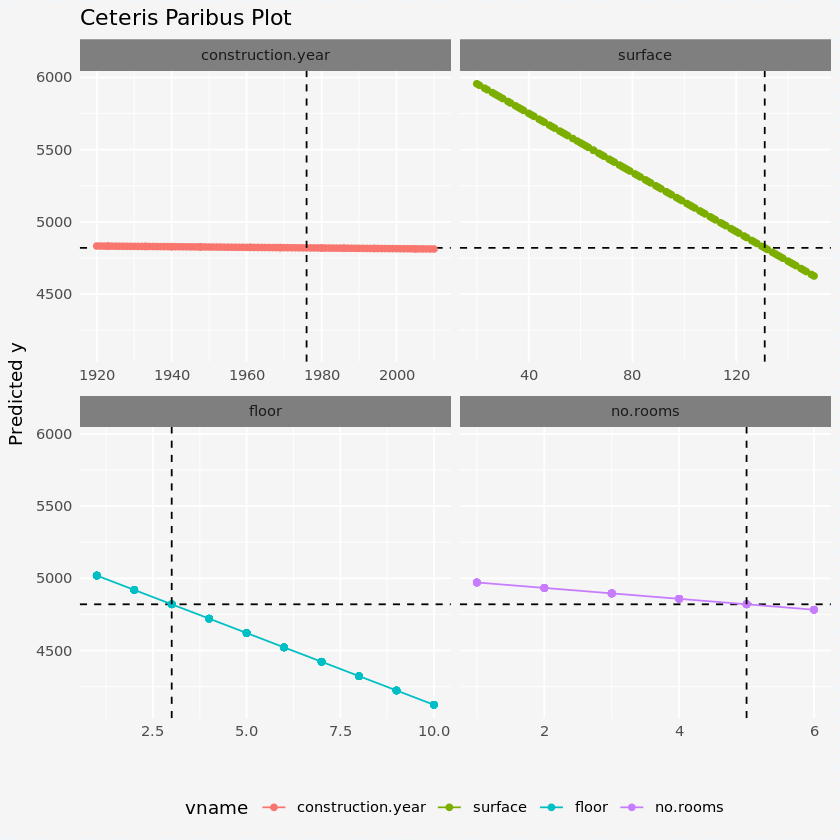

In [35]:
plot(wi_lm, split = "variables", color = "variables", quantiles = FALSE)

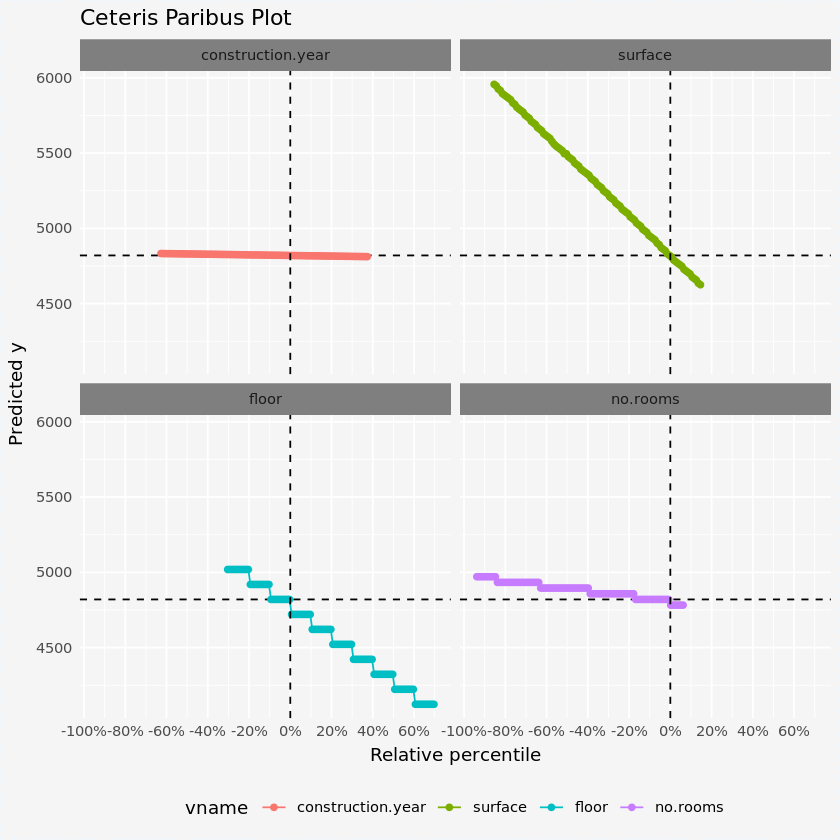

In [36]:
plot(wi_lm, split = "variables", color = "variables")

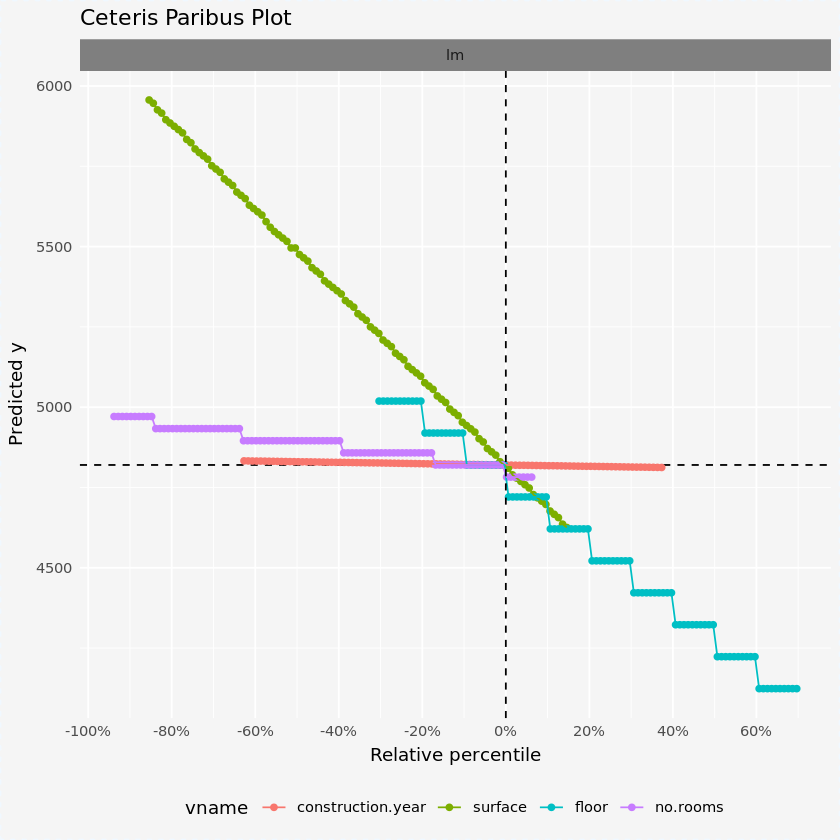

In [37]:
plot(wi_lm)

## The new interface (ceteris_paribus)

Here is the one with ceteris_paribus().

In [38]:
cp_rf <- ceteris_paribus(explainer_rf, observation = new_apartment)
cp_rf

m2.price construction.year surface floor no.rooms district   
1001      4644     1920              131     3     5        Srodmiescie
1001.1    4644     1921              131     3     5        Srodmiescie
1001.2    4644     1922              131     3     5        Srodmiescie
1001.3    4644     1923              131     3     5        Srodmiescie
1001.4    4644     1923              131     3     5        Srodmiescie
1001.5    4644     1924              131     3     5        Srodmiescie
1001.6    4644     1925              131     3     5        Srodmiescie
1001.7    4644     1926              131     3     5        Srodmiescie
1001.8    4644     1927              131     3     5        Srodmiescie
1001.9    4644     1928              131     3     5        Srodmiescie
1001.10   4644     1929              131     3     5        Srodmiescie
1001.11   4644     1930              131     3     5        Srodmiescie
1001.12   4644     1931              131     3     5        Srodmiescie
1001.13   4644     1932              131     3     5        Srodmiescie
1001.14   4644     1933              131     3     5        Srodmiescie
1001.15   4644     1933              131     3     5        Srodmiescie
1001.16   4644     1934              131     3     5        Srodmiescie
1001.17   4644     1935              131     3     5        Srodmiescie
1001.18   4644     1936              131     3     5        Srodmiescie
1001.19   4644     1937              131     3     5        Srodmiescie
1001.20   4644     1938              131     3     5        Srodmiescie
1001.21   4644     1939              131     3     5        Srodmiescie
1001.22   4644     1940              131     3     5        Srodmiescie
1001.23   4644     1940              131     3     5        Srodmiescie
1001.24   4644     1941              131     3     5        Srodmiescie
1001.25   4644     1942              131     3     5        Srodmiescie
1001.26   4644     1943              131     3     5        Srodmiescie
1001.27   4644     1944              131     3     5        Srodmiescie
1001.28   4644     1945              131     3     5        Srodmiescie
1001.29   4644     1946              131     3     5        Srodmiescie
⋮         ⋮        ⋮                 ⋮       ⋮     ⋮        ⋮          
1001.815  4644     1976              131     3     5        Srodmiescie
1001.823  4644     1976              131     3     5        Srodmiescie
1001.833  4644     1976              131     3     5        Srodmiescie
1001.843  4644     1976              131     3     5        Srodmiescie
1001.853  4644     1976              131     3     5        Srodmiescie
1001.863  4644     1976              131     3     5        Srodmiescie
1001.873  4644     1976              131     3     5        Srodmiescie
1001.883  4644     1976              131     3     5        Srodmiescie
1001.893  4644     1976              131     3     5        Srodmiescie
1001.903  4644     1976              131     3     5        Srodmiescie
1001.915  4644     1976              131     3     5        Srodmiescie
1001.923  4644     1976              131     3     5        Srodmiescie
1001.933  4644     1976              131     3     5        Srodmiescie
1001.943  4644     1976              131     3     6        Srodmiescie
1001.953  4644     1976              131     3     6        Srodmiescie
1001.963  4644     1976              131     3     6        Srodmiescie
1001.973  4644     1976              131     3     6        Srodmiescie
1001.983  4644     1976              131     3     6        Srodmiescie
1001.993  4644     1976              131     3     6        Srodmiescie
1001.1003 4644     1976              131     3     6        Srodmiescie
10014     4644     1976              131     3     5        Srodmiescie
1001.116  4644     1976              131     3     5        Mokotow    
1001.216  4644     1976              131     3     5        Bielany    
1001.316  4644     1976              131     3    

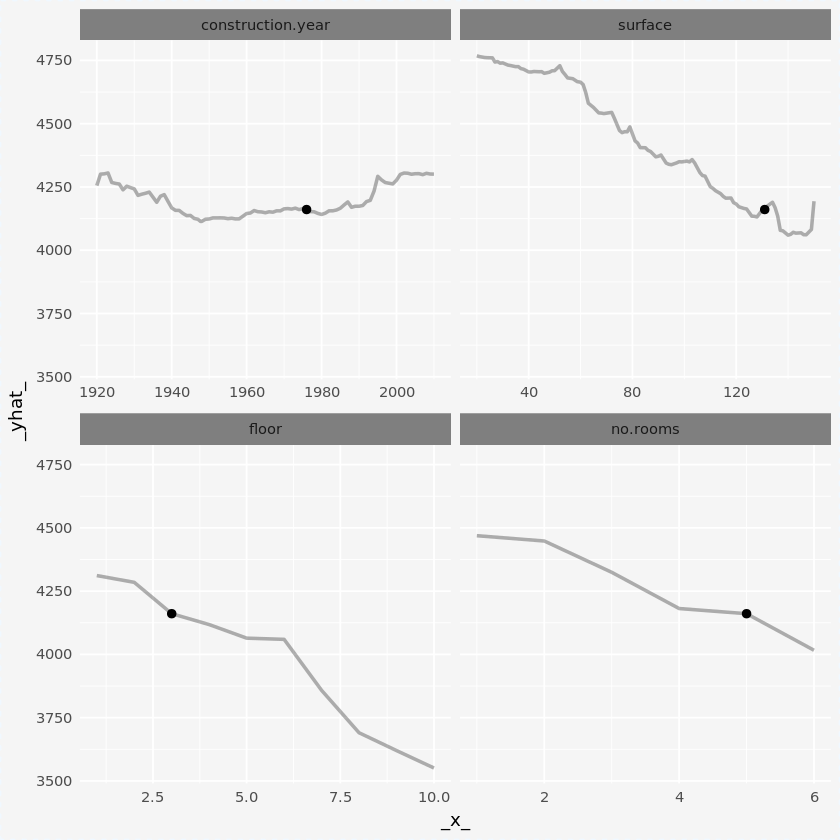

In [39]:
plot(cp_rf)

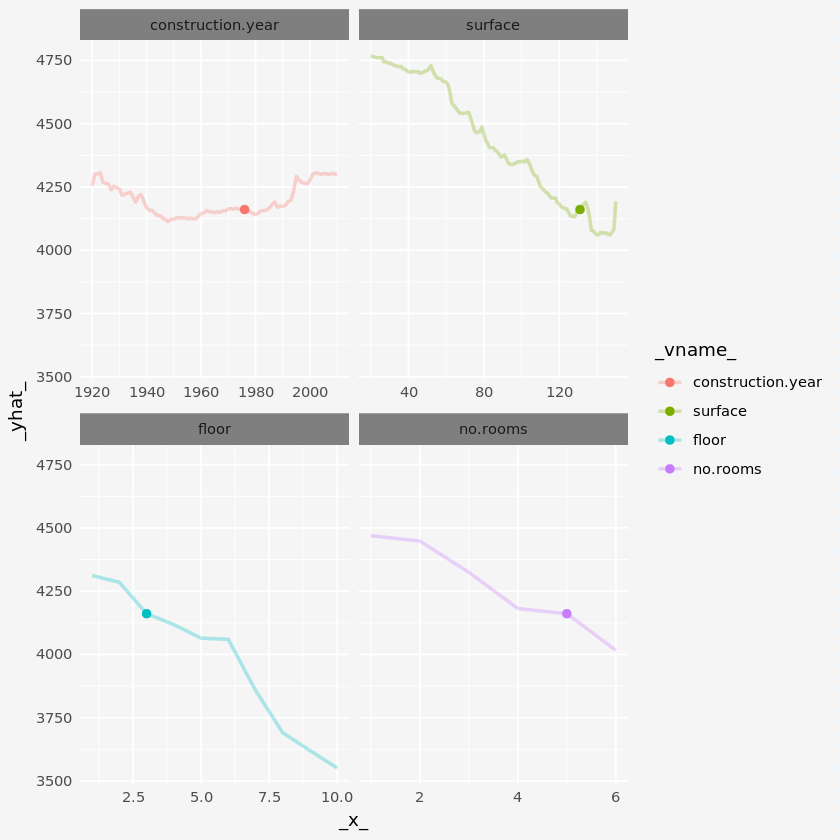

In [53]:
plot(cp_rf, color = "_vname_")

In [41]:
cp_lm <- ceteris_paribus(explainer_lm, observation = new_apartment)
cp_lm

m2.price construction.year surface floor no.rooms district   
1001      4644     1920              131     3     5        Srodmiescie
1001.1    4644     1921              131     3     5        Srodmiescie
1001.2    4644     1922              131     3     5        Srodmiescie
1001.3    4644     1923              131     3     5        Srodmiescie
1001.4    4644     1923              131     3     5        Srodmiescie
1001.5    4644     1924              131     3     5        Srodmiescie
1001.6    4644     1925              131     3     5        Srodmiescie
1001.7    4644     1926              131     3     5        Srodmiescie
1001.8    4644     1927              131     3     5        Srodmiescie
1001.9    4644     1928              131     3     5        Srodmiescie
1001.10   4644     1929              131     3     5        Srodmiescie
1001.11   4644     1930              131     3     5        Srodmiescie
1001.12   4644     1931              131     3     5        Srodmiescie
1001.13   4644     1932              131     3     5        Srodmiescie
1001.14   4644     1933              131     3     5        Srodmiescie
1001.15   4644     1933              131     3     5        Srodmiescie
1001.16   4644     1934              131     3     5        Srodmiescie
1001.17   4644     1935              131     3     5        Srodmiescie
1001.18   4644     1936              131     3     5        Srodmiescie
1001.19   4644     1937              131     3     5        Srodmiescie
1001.20   4644     1938              131     3     5        Srodmiescie
1001.21   4644     1939              131     3     5        Srodmiescie
1001.22   4644     1940              131     3     5        Srodmiescie
1001.23   4644     1940              131     3     5        Srodmiescie
1001.24   4644     1941              131     3     5        Srodmiescie
1001.25   4644     1942              131     3     5        Srodmiescie
1001.26   4644     1943              131     3     5        Srodmiescie
1001.27   4644     1944              131     3     5        Srodmiescie
1001.28   4644     1945              131     3     5        Srodmiescie
1001.29   4644     1946              131     3     5        Srodmiescie
⋮         ⋮        ⋮                 ⋮       ⋮     ⋮        ⋮          
1001.815  4644     1976              131     3     5        Srodmiescie
1001.823  4644     1976              131     3     5        Srodmiescie
1001.833  4644     1976              131     3     5        Srodmiescie
1001.843  4644     1976              131     3     5        Srodmiescie
1001.853  4644     1976              131     3     5        Srodmiescie
1001.863  4644     1976              131     3     5        Srodmiescie
1001.873  4644     1976              131     3     5        Srodmiescie
1001.883  4644     1976              131     3     5        Srodmiescie
1001.893  4644     1976              131     3     5        Srodmiescie
1001.903  4644     1976              131     3     5        Srodmiescie
1001.915  4644     1976              131     3     5        Srodmiescie
1001.923  4644     1976              131     3     5        Srodmiescie
1001.933  4644     1976              131     3     5        Srodmiescie
1001.943  4644     1976              131     3     6        Srodmiescie
1001.953  4644     1976              131     3     6        Srodmiescie
1001.963  4644     1976              131     3     6        Srodmiescie
1001.973  4644     1976              131     3     6        Srodmiescie
1001.983  4644     1976              131     3     6        Srodmiescie
1001.993  4644     1976              131     3     6        Srodmiescie
1001.1003 4644     1976              131     3     6        Srodmiescie
10014     4644     1976              131     3     5        Srodmiescie
1001.116  4644     1976              131     3     5        Mokotow    
1001.216  4644     1976              131     3     5        Bielany    
1001.316  4644     1976              131     3    

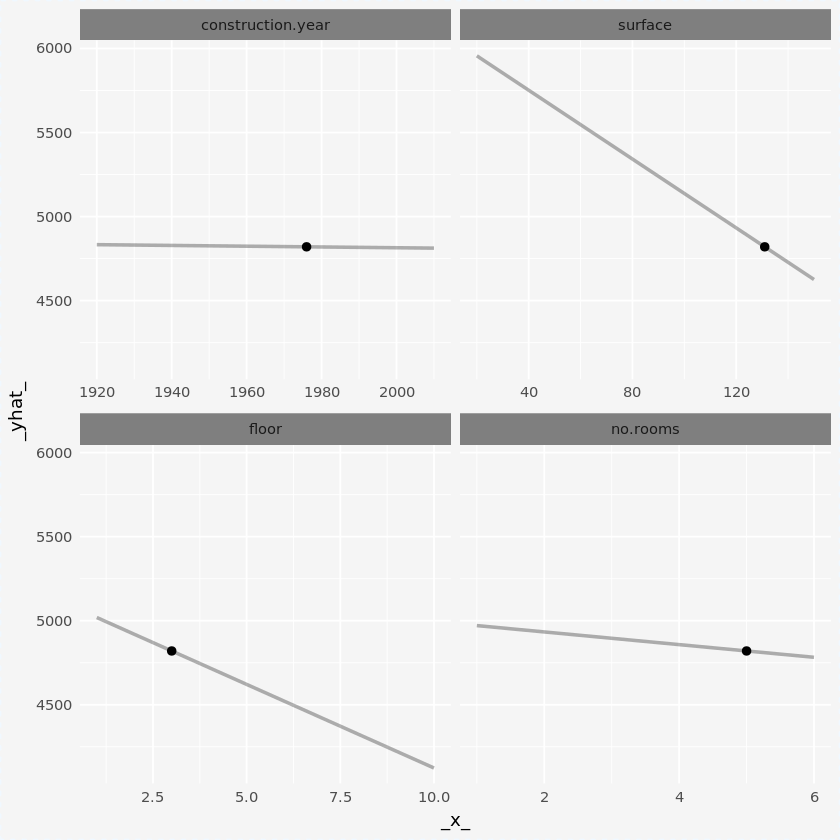

In [42]:
plot(cp_lm)

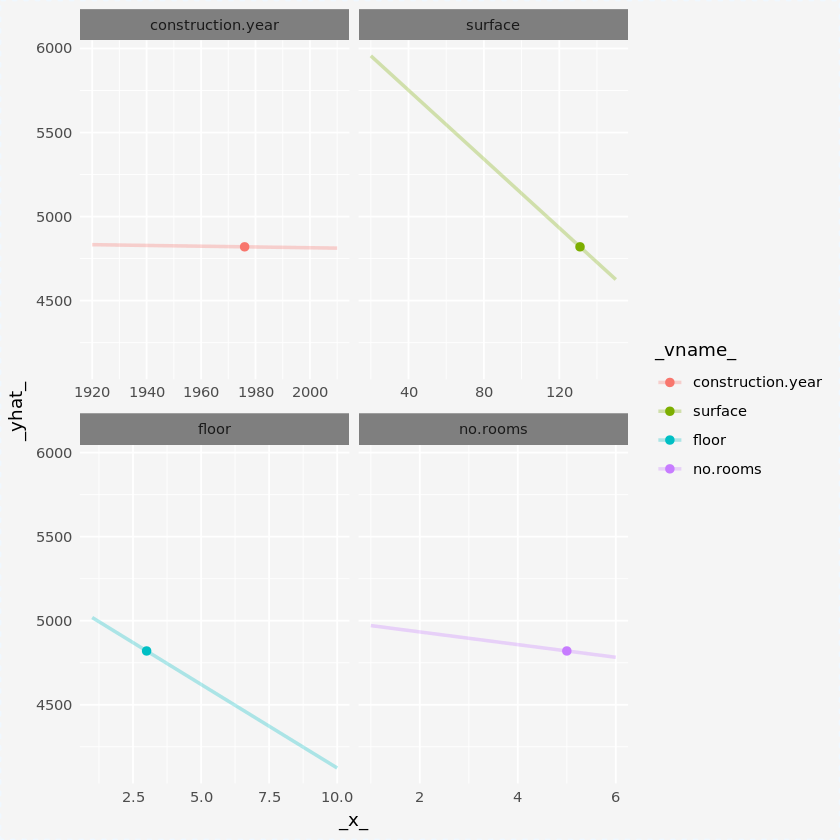

In [45]:
plot(cp_lm, color = "_vname_")

## Ceteris Paribus - two models
### The old interface (what_if)

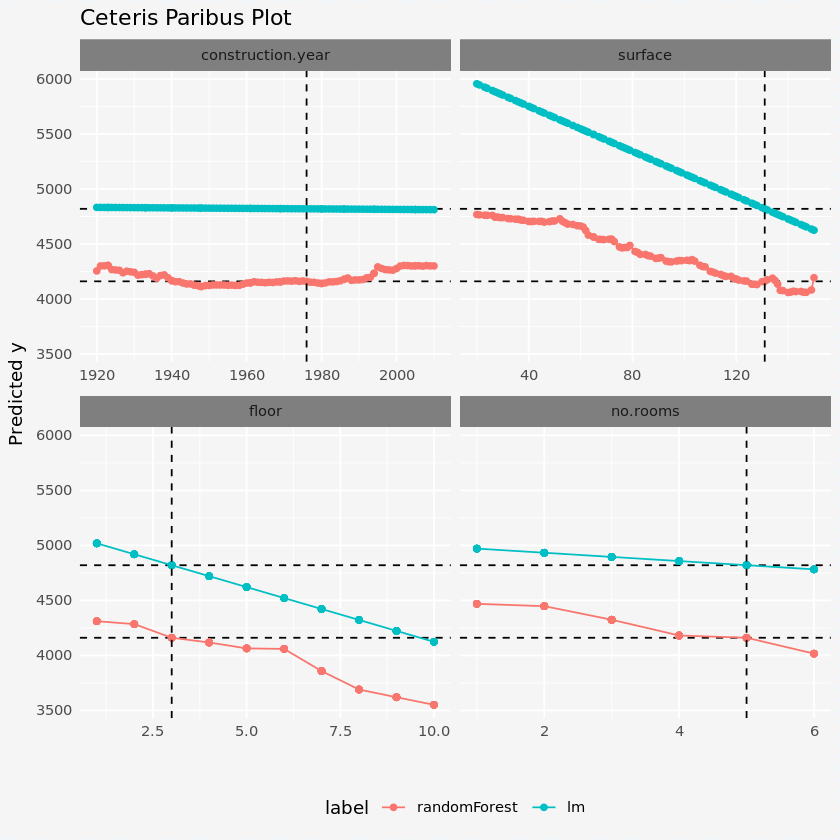

In [46]:
plot(wi_rf, wi_lm, split = "variables", color = "models", quantiles = FALSE)

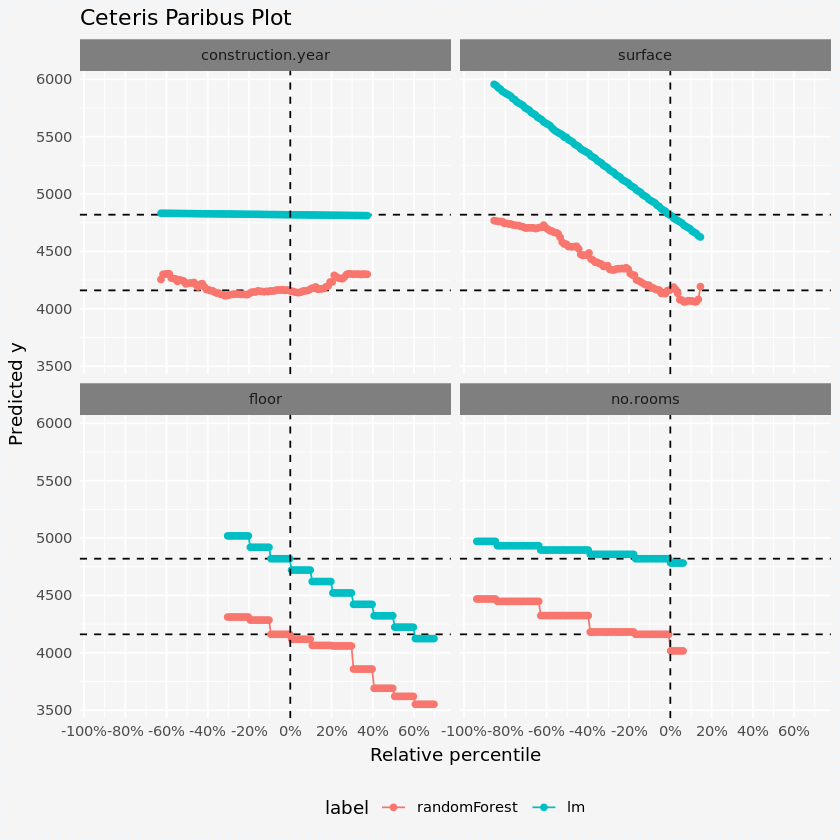

In [47]:
plot(wi_rf, wi_lm, split = "variables", color = "models")

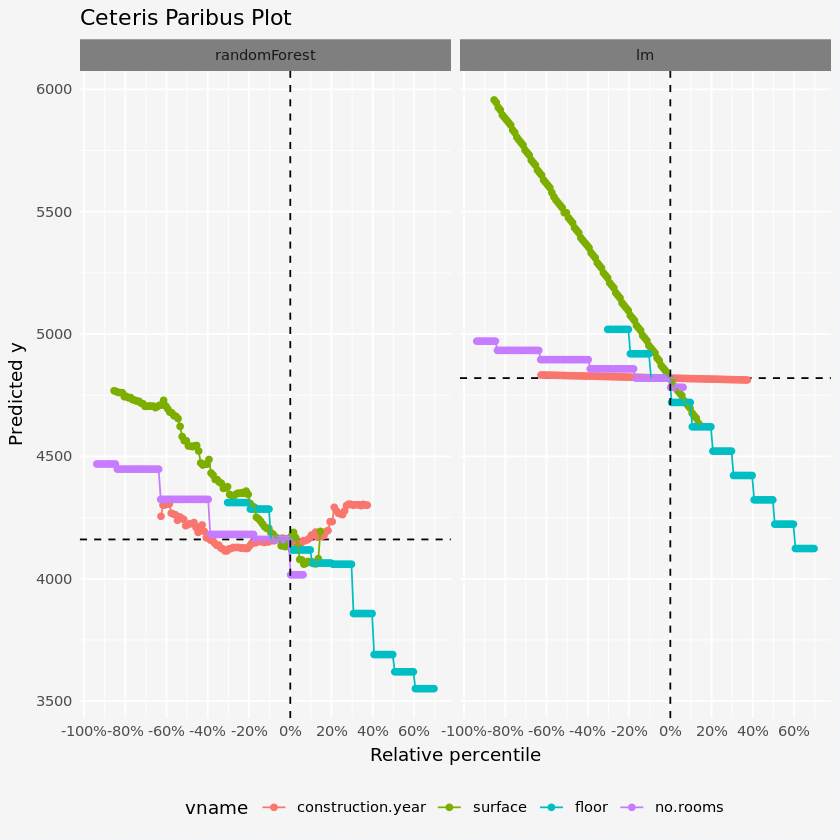

In [48]:
plot(wi_rf, wi_lm)

## The new interface (ceteris_paribus)

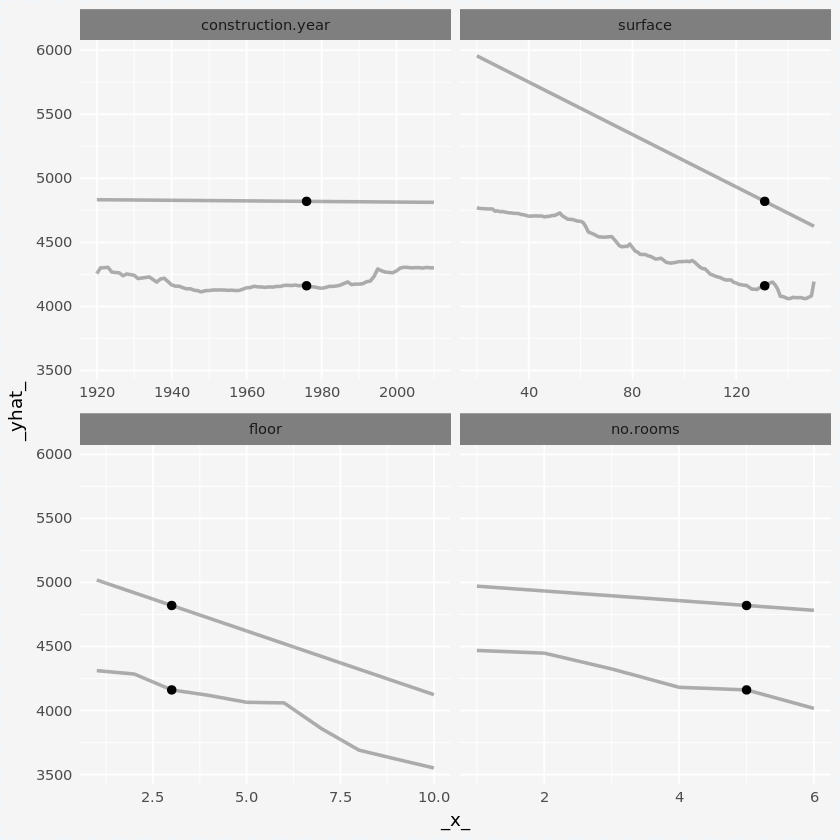

In [49]:
plot(cp_rf, cp_lm)

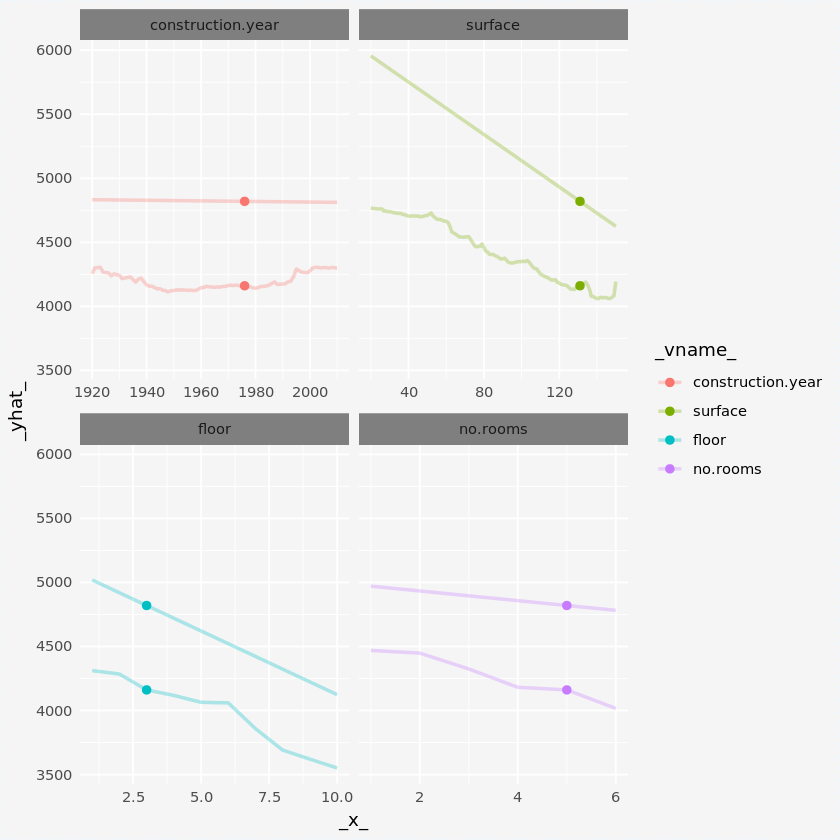

In [50]:
plot(cp_rf, cp_lm, color = "_vname_")

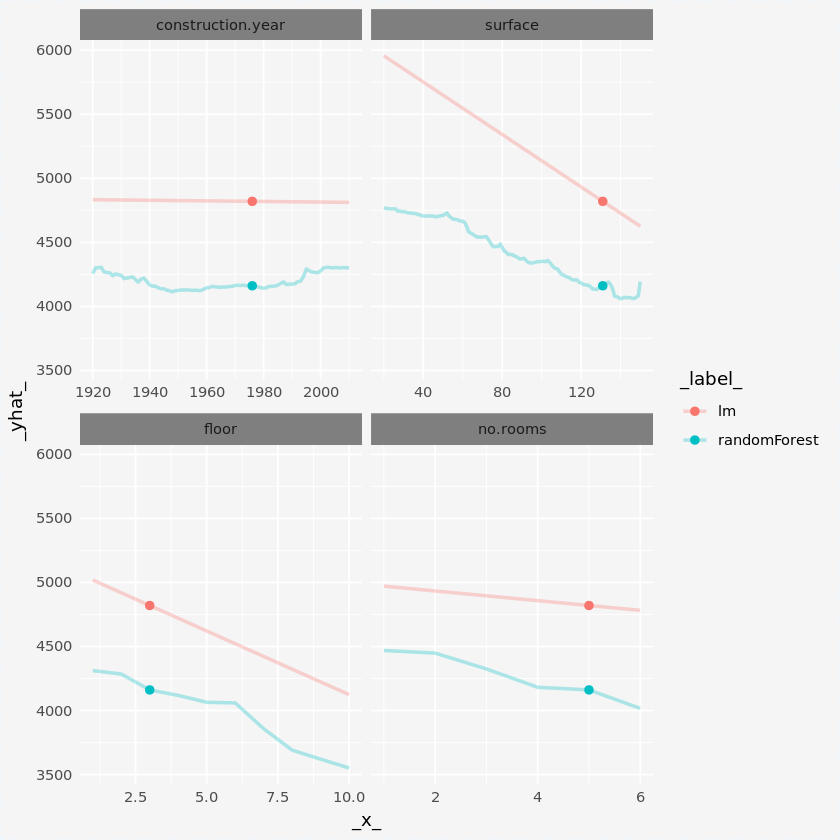

In [51]:
plot(cp_rf, cp_lm, color = "_label_")

## Interactive Ceteris Paribus Plots

Deprecated. Only for the old interface.

In [52]:
library("ggiraph")

plot_interactive(wi_rf, split = "variables", color = "variables")
plot_interactive(wi_rf)

plot_interactive(wi_lm, split = "variables", color = "variables")
plot_interactive(wi_lm)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)

## Interactive Ceteris Paribus Plots - two models

In [24]:
plot_interactive(wi_rf, wi_lm)
plot_interactive(wi_rf, wi_lm, split = "variables")

HTML widgets cannot be represented in plain text (need html)

HTML widgets cannot be represented in plain text (need html)